<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Machine Learning Para Aplicações Biomédicas</font>
## <font color='blue'>Projeto 3</font>
### <font color='blue'>Machine Learning Para Diagnóstico Probabilístico de Doença Degenerativa</font>

## Pacotes Python Usados no Projeto

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
# Imports
import math
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



## Carregando o Conjunto de Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [5]:
# Shape
df_dsa.shape

(240, 48)

In [6]:
# Visualiza
df_dsa.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [7]:
# Contagem de registros por categoria
df_dsa.Recording.value_counts()

Recording
1    80
2    80
3    80
Name: count, dtype: int64

In [8]:
# Contagem de registros por categoria
df_dsa.Status.value_counts()

Status
0    120
1    120
Name: count, dtype: int64

In [9]:
# Contagem de registros por categoria
df_dsa.Gender.value_counts()

Gender
0    144
1     96
Name: count, dtype: int64

In [10]:
# Colunas
df_dsa.columns

Index(['ID', 'Recording', 'Status', 'Gender', 'Jitter_rel', 'Jitter_abs',
       'Jitter_RAP', 'Jitter_PPQ', 'Shim_loc', 'Shim_dB', 'Shim_APQ3',
       'Shim_APQ5', 'Shim_APQ11', 'HNR05', 'HNR15', 'HNR25', 'HNR35', 'HNR38',
       'RPDE', 'DFA', 'PPE', 'GNE', 'MFCC0', 'MFCC1', 'MFCC2', 'MFCC3',
       'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10',
       'MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2', 'Delta3', 'Delta4',
       'Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9', 'Delta10', 'Delta11',
       'Delta12'],
      dtype='object')

In [11]:
# Tipos de dados
df_dsa.dtypes

ID             object
Recording       int64
Status          int64
Gender          int64
Jitter_rel    float64
Jitter_abs    float64
Jitter_RAP    float64
Jitter_PPQ    float64
Shim_loc      float64
Shim_dB       float64
Shim_APQ3     float64
Shim_APQ5     float64
Shim_APQ11    float64
HNR05         float64
HNR15         float64
HNR25         float64
HNR35         float64
HNR38         float64
RPDE          float64
DFA           float64
PPE           float64
GNE           float64
MFCC0         float64
MFCC1         float64
MFCC2         float64
MFCC3         float64
MFCC4         float64
MFCC5         float64
MFCC6         float64
MFCC7         float64
MFCC8         float64
MFCC9         float64
MFCC10        float64
MFCC11        float64
MFCC12        float64
Delta0        float64
Delta1        float64
Delta2        float64
Delta3        float64
Delta4        float64
Delta5        float64
Delta6        float64
Delta7        float64
Delta8        float64
Delta9        float64
Delta10   

In [12]:
# Resumo estatístico
df_dsa.describe()

,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2.000000,0.500000,0.400000,0.583987,0.000044,0.003172,0.003532,0.038428,0.336832,0.021499,...,1.343238,1.348914,1.337717,1.341786,1.340895,1.343978,1.341472,1.331433,1.346381,1.346144
std,0.818203,0.501045,0.490922,0.535769,0.000045,0.003373,0.004449,0.023213,0.205905,0.013787,...,0.198174,0.212008,0.204978,0.209407,0.213689,0.211364,0.204085,0.211297,0.221484,0.208819
min,1.000000,0.000000,0.000000,0.148010,0.000007,0.000678,0.001036,0.007444,0.064989,0.003344,...,0.766458,0.840133,0.741690,0.759689,0.764649,0.762798,0.811942,0.777012,0.643132,0.748411
25%,1.000000,0.000000,0.000000,0.298260,0.000019,0.001551,0.001867,0.024336,0.211785,0.012910,...,1.208624,1.221101,1.197868,1.194186,1.194138,1.191881,1.189515,1.192397,1.202525,1.206559
50%,2.000000,0.500000,0.000000,0.481455,0.000035,0.002337,0.002870,0.032960,0.287885,0.018571,...,1.351015,1.342237,1.337233,1.338437,1.344416,1.335517,1.349243,1.333345,1.347297,1.331212
75%,3.000000,1.000000,1.000000,0.681685,0.000056,0.003678,0.003991,0.045475,0.399860,0.025784,...,1.488878,1.470287,1.485597,1.496845,1.490389,1.495355,1.475330,1.472589,1.506674,1.475235
max,3.000000,1.000000,1.000000,6.838200,0.000550,0.043843,0.065199,0.192600,1.747600,0.113240,...,1.860588,2.038241,1.785984,1.988090,1.872799,1.920131,1.943331,1.949679,1.918392,1.930103


## Reorganização dos Dados

In [13]:
# Visualiza
df_dsa.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [14]:
# Colunas
nomes_colunas = df_dsa.columns

In [15]:
nomes_colunas

Index(['ID', 'Recording', 'Status', 'Gender', 'Jitter_rel', 'Jitter_abs',
       'Jitter_RAP', 'Jitter_PPQ', 'Shim_loc', 'Shim_dB', 'Shim_APQ3',
       'Shim_APQ5', 'Shim_APQ11', 'HNR05', 'HNR15', 'HNR25', 'HNR35', 'HNR38',
       'RPDE', 'DFA', 'PPE', 'GNE', 'MFCC0', 'MFCC1', 'MFCC2', 'MFCC3',
       'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10',
       'MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2', 'Delta3', 'Delta4',
       'Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9', 'Delta10', 'Delta11',
       'Delta12'],
      dtype='object')

In [16]:
#  Extrai os atributos do tipo float (variáveis de entrada) para padronização
atributos = nomes_colunas[4:]

In [17]:
atributos

Index(['Jitter_rel', 'Jitter_abs', 'Jitter_RAP', 'Jitter_PPQ', 'Shim_loc',
       'Shim_dB', 'Shim_APQ3', 'Shim_APQ5', 'Shim_APQ11', 'HNR05', 'HNR15',
       'HNR25', 'HNR35', 'HNR38', 'RPDE', 'DFA', 'PPE', 'GNE', 'MFCC0',
       'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2',
       'Delta3', 'Delta4', 'Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9',
       'Delta10', 'Delta11', 'Delta12'],
      dtype='object')

In [18]:
# Contador
location = 4

In [19]:
# Padronização min-max
for atributo in atributos:
    
    # Lista
    padronizados = []
    
    # Loop pelos atributos
    for i in df_dsa[atributo]:
        
        # Cria regra para padronização dos dados
        padronizados.append(math.log(i, 10))
        
    # Aplica padronização
    padronizados = minmax_scale(padronizados)
    
    # Remove do dataframe o atributo original
    df_dsa = df_dsa.drop(columns = atributo)
    
    # Insere o atributo padronizado
    df_dsa.insert(loc = location, column = atributo, value = padronizados)
    
    # Ajusta o contador
    location += 1

In [20]:
# Lista de atributos
nomes_atributos = df_dsa.columns[4:]

In [21]:
nomes_atributos

Index(['Jitter_rel', 'Jitter_abs', 'Jitter_RAP', 'Jitter_PPQ', 'Shim_loc',
       'Shim_dB', 'Shim_APQ3', 'Shim_APQ5', 'Shim_APQ11', 'HNR05', 'HNR15',
       'HNR25', 'HNR35', 'HNR38', 'RPDE', 'DFA', 'PPE', 'GNE', 'MFCC0',
       'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2',
       'Delta3', 'Delta4', 'Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9',
       'Delta10', 'Delta11', 'Delta12'],
      dtype='object')

In [22]:
# Novo dataframe (vazio)
dados = pd.DataFrame(columns = nomes_atributos)   

In [23]:
dados.head()

,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shim_APQ11,HNR05,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12


In [24]:
# Variáveis do tipo int
status = df_dsa['Status'].tolist()
gender = df_dsa['Gender'].tolist()

In [25]:
# Listas
novo_status = []
novo_gender = []

In [26]:
# Carrega o novo dataframe calculando a média dos valores dos registros de áudio para cada paciente
for i in range(0, len(status), 3):
    
    # Carrega novo status e novo gender
    novo_status.append(status[i])
    novo_gender.append(gender[i])
    
    # Calcula a média dos atributos
    mean = df_dsa[nomes_atributos].iloc[[i, i + 1, i + 2]].mean(axis = 0)
    
    # Carrega os dados
    dados = pd.concat([dados, pd.DataFrame([mean])], ignore_index = True)

In [27]:
# Visualiza
dados.head()

,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shim_APQ11,HNR05,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,0.167313,0.188417,0.200556,0.133088,0.357736,0.352159,0.398112,0.387301,0.310350,0.642315,...,0.665718,0.510483,0.628141,0.635890,0.690788,0.650952,0.613847,0.615713,0.675877,0.605082
1,0.107455,0.150592,0.090730,0.062494,0.217872,0.215143,0.248739,0.252244,0.202908,0.725295,...,0.754630,0.660136,0.747662,0.791970,0.710295,0.753832,0.780908,0.789895,0.780707,0.715060
2,0.113051,0.166572,0.166969,0.095198,0.276710,0.274003,0.305235,0.316930,0.257402,0.787118,...,0.844668,0.646489,0.781302,0.620814,0.762391,0.666213,0.655040,0.766339,0.883611,0.752251
3,0.530916,0.580286,0.553443,0.430681,0.379989,0.378006,0.416113,0.372117,0.362253,0.805066,...,0.768217,0.611319,0.826046,0.683721,0.813216,0.707039,0.800814,0.608143,0.844810,0.788565
4,0.359656,0.547033,0.343497,0.298568,0.480625,0.472485,0.494463,0.496986,0.494824,0.762525,...,0.673844,0.643307,0.902141,0.749905,0.923264,0.657936,0.675329,0.618058,0.721695,0.762546


In [28]:
# Finaliza o dataframe
dados.insert(0, 'Gender', novo_gender)
dados.insert(0, 'Status', novo_status)

In [29]:
# Shape
dados.shape

(80, 46)

In [30]:
# Visualiza
dados.head()

,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,0,1,0.167313,0.188417,0.200556,0.133088,0.357736,0.352159,0.398112,0.387301,...,0.665718,0.510483,0.628141,0.635890,0.690788,0.650952,0.613847,0.615713,0.675877,0.605082
1,0,0,0.107455,0.150592,0.090730,0.062494,0.217872,0.215143,0.248739,0.252244,...,0.754630,0.660136,0.747662,0.791970,0.710295,0.753832,0.780908,0.789895,0.780707,0.715060
2,0,1,0.113051,0.166572,0.166969,0.095198,0.276710,0.274003,0.305235,0.316930,...,0.844668,0.646489,0.781302,0.620814,0.762391,0.666213,0.655040,0.766339,0.883611,0.752251
3,0,1,0.530916,0.580286,0.553443,0.430681,0.379989,0.378006,0.416113,0.372117,...,0.768217,0.611319,0.826046,0.683721,0.813216,0.707039,0.800814,0.608143,0.844810,0.788565
4,0,0,0.359656,0.547033,0.343497,0.298568,0.480625,0.472485,0.494463,0.496986,...,0.673844,0.643307,0.902141,0.749905,0.923264,0.657936,0.675329,0.618058,0.721695,0.762546


In [31]:
# Dados com todos os resultados médios dos 3 registros de cada pessoa
dados.to_csv('dados_reorganizados.csv')

## Pré-Processamento dos Dados

In [32]:
# Carregando os dados
dados_finais = pd.read_csv('dados_reorganizados.csv')
dados_finais = dados_finais.drop(columns = ["Unnamed: 0"])
dados_finais.head(5)

,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,0,1,0.167313,0.188417,0.200556,0.133088,0.357736,0.352159,0.398112,0.387301,...,0.665718,0.510483,0.628141,0.635890,0.690788,0.650952,0.613847,0.615713,0.675877,0.605082
1,0,0,0.107455,0.150592,0.090730,0.062494,0.217872,0.215143,0.248739,0.252244,...,0.754630,0.660136,0.747662,0.791970,0.710295,0.753832,0.780908,0.789895,0.780707,0.715060
2,0,1,0.113051,0.166572,0.166969,0.095198,0.276710,0.274003,0.305235,0.316930,...,0.844668,0.646489,0.781302,0.620814,0.762391,0.666213,0.655040,0.766339,0.883611,0.752251
3,0,1,0.530916,0.580286,0.553443,0.430681,0.379989,0.378006,0.416113,0.372117,...,0.768217,0.611319,0.826046,0.683721,0.813216,0.707039,0.800814,0.608143,0.844810,0.788565
4,0,0,0.359656,0.547033,0.343497,0.298568,0.480625,0.472485,0.494463,0.496986,...,0.673844,0.643307,0.902141,0.749905,0.923264,0.657936,0.675329,0.618058,0.721695,0.762546


In [33]:
# Extrai os valores do dataframe
df_values = dados_finais.values

In [34]:
# A variável target é a coluna de índice zero
target = df_values[:, 0].astype(int)

In [35]:
# Para os atributos descartamos as colunas de índice 0 e índice 1 (status e gender)
atributos = np.delete(df_values, 0, 1)

In [36]:
atributos.shape

(80, 45)

In [37]:
target.shape

(80,)

In [38]:
# Divisão
x_treino, x_teste, y_treino, y_teste = train_test_split(atributos, target, test_size = 0.20, random_state = 42)

In [39]:
x_treino.shape

(64, 45)

In [40]:
y_treino.shape

(64,)

In [41]:
x_teste.shape

(16, 45)

In [42]:
y_teste.shape

(16,)

## Machine Learning

Algoritmo Naive Bayes

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Veja a descrição do algoritmo no videobook do Capítulo 8.

In [43]:
# Cria o modelo
modelo = GaussianNB()

In [44]:
# Treina o modelo e faz as previsões
previsoes = modelo.fit(x_treino, y_treino).predict(x_teste)

In [45]:
# Calcula as métricas
cm = metrics.confusion_matrix(y_teste, previsoes)
print("\nMatriz de Confusão:")
print(cm)
print("\nAcurácia:", metrics.accuracy_score(y_teste, previsoes))
print("Precisão: ", metrics.precision_score(y_teste, previsoes))
print("Recall: ", metrics.recall_score(y_teste, previsoes))


Matriz de Confusão:
[[10  1]
 [ 0  5]]

Acurácia: 0.9375
Precisão:  0.8333333333333334
Recall:  1.0


In [46]:
# Previsões de classe
previsoes

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [47]:
# Previsões como probabilidade
previsoes_proba = modelo.predict_proba(x_teste)

In [48]:
# Previsões de probabilidade
previsoes_proba

array([[1.00000000e+000, 9.13044259e-022],
       [9.99954362e-001, 4.56380554e-005],
       [1.00000000e+000, 6.21725543e-021],
       [1.00000000e+000, 3.12319146e-020],
       [1.00000000e+000, 1.32722602e-010],
       [9.99998214e-001, 1.78634437e-006],
       [6.65110439e-020, 1.00000000e+000],
       [9.98607325e-141, 1.00000000e+000],
       [1.00000000e+000, 6.04626121e-016],
       [9.99999999e-001, 1.07161963e-009],
       [4.17481369e-044, 1.00000000e+000],
       [1.00000000e+000, 2.14816561e-018],
       [6.20730920e-092, 1.00000000e+000],
       [1.00000000e+000, 4.68952265e-022],
       [3.48762051e-032, 1.00000000e+000],
       [2.74111238e-019, 1.00000000e+000]])

In [49]:
# Extraindo previsões de probabilidade da classe 1 (positiva)
previsoes_proba[:,1]

array([9.13044259e-22, 4.56380554e-05, 6.21725543e-21, 3.12319146e-20,
       1.32722602e-10, 1.78634437e-06, 1.00000000e+00, 1.00000000e+00,
       6.04626121e-16, 1.07161963e-09, 1.00000000e+00, 2.14816561e-18,
       1.00000000e+00, 4.68952265e-22, 1.00000000e+00, 1.00000000e+00])

In [50]:
# Métricas da curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_teste, previsoes_proba[:,1], pos_label = 1, sample_weight = None)

ROC AUC Score:  0.9545454545454545


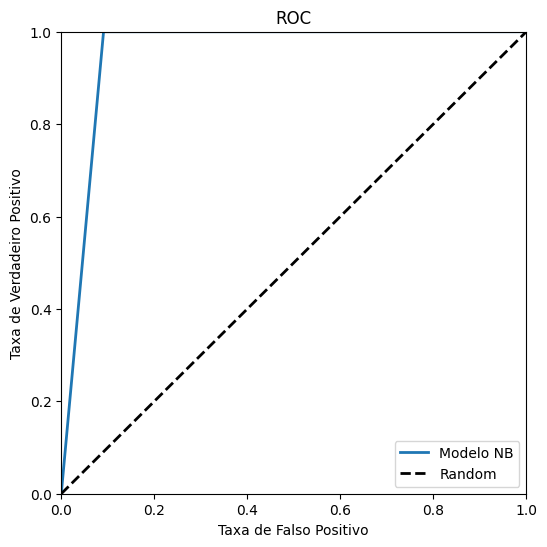

In [51]:
# Gráfico ROC
print("ROC AUC Score: ", metrics.roc_auc_score(y_teste, 
                                               previsoes_proba[:,1]))
plt.figure(figsize = (6,6))
plt.plot(fpr, tpr, linewidth = 2.0, label = "Modelo NB")
plt.plot([0,1], [0,1], 'k--', linewidth = 2.0, label = "Random")
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc = "lower right")
plt.show();

## Os Limites de Teste Alteram o Trade-off Entre Sensibilidade e Especificidade

A Sensibilidade é a capacidade do modelo em identificar, dentre as pessoas com suspeita da doença, àquelas realmente doentes. Ou seja, prever a classe positiva.

A Especificidade é a capacidade do mesmo modelo prever a classe negativa nos indivíduos que não apresentam a doença que está sendo investigada.

___

- Sensibilidade = TruePositive / (TruePositive + FalseNegative)
- Sensibilidade = True Positive Rate

___

- Especificidade (Recall) = TrueNegative / (FalsePositive + TrueNegative)
- Especificidade = 1 – False Positive Rate

___

O modelo ideal seria aquele que apresentasse 100% de sensibilidade e 100% de especificidade. Assim, teríamos apenas dois resultados: negativo (a pessoa não estaria doente) ou positivo (o indivíduo estaria doente). Portanto, não teríamos o falso-negativo ou o falso-positivo.

Infelizmente, isso raramente ocorre na prática. Imagine uma balança, onde um dos pratos é a sensibilidade e o outro, a especificidade. Se ocorre melhora na sensibilidade de um modelo (o prato da balança sobe), frequentemente ocorre diminuição na especificidade (o prato da balança desce). Em algumas situações, ter uma sensibilidade de 100% é muito importante, como nas triagens sorológicas em bancos de sangue, onde os testes são realizados para a prevenção de transmissão de infecções.

Para a detecção de uma doença, por exemplo, a sensibilidade clínica é influenciada por fatores diversos, como por exemplo: o dia da coleta em relação ao início da infecção, o tipo de amostra utilizada, manifestações clínicas do paciente e a qualidade pré-técnica da amostra.

Muitos algoritmos de aprendizado de máquina são capazes de prever uma probabilidade ou uma pontuação de associação de classe.

Geralmente, isso é útil porque fornece uma medida da certeza ou incerteza de uma previsão. Ele também fornece granularidade adicional sobre apenas prever o rótulo da classe que pode ser interpretado.

Algumas tarefas de classificação requerem uma previsão exata do rótulo da classe. Isso significa que, embora uma probabilidade ou pontuação de associação de classe seja prevista, ela deve ser convertida em um rótulo de classe claro.

A decisão de converter uma probabilidade prevista ou pontuação em um rótulo de classe é governada por um parâmetro denominado "limite de decisão", "limite de discriminação" ou simplesmente o "limite" (threshold). O valor padrão para o limite é 0,5 para probabilidades previstas normalizadas ou pontuações no intervalo entre 0 ou 1.

Por exemplo, em um problema de classificação binária com rótulos de classe 0 e 1, e um limite de 0,5, então, valores menores que o limite de 0,5 são atribuídos à classe 0 e valores maiores ou iguais a 0,5 são atribuídos à classe 1 .

- Previsão < 0,5 = Classe 0
- Previsão >= 0,5 = Classe 1

O limite (threshold) no Scikit-Learn é 0,5 para classificação binária e qualquer classe que tenha a maior probabilidade em classificação multiclasse. Em muitos problemas, um resultado muito melhor pode ser obtido ajustando o limite. 

A maioria dos métodos de ajuste do limite é baseada nas características de operação do receptor (ROC) e na estatística J de Youden, mas também pode ser feito por outros métodos, como uma pesquisa com um algoritmo genético.

Aqui está um artigo que descreve como fazer isso em problemas na área Biomédica:

http://www.ncbi.nlm.nih.gov/pmc/articles/PMC2515362/

In [52]:
# Import
from sklearn.metrics import confusion_matrix

In [53]:
# Função para calcular a Sensibilidade
def dsa_calcula_sensibilidade(y_verdadeiro, y_predito):
    
    # Gera a matriz de confusão
    tn, fp, fn, tp = confusion_matrix(y_verdadeiro, y_predito).ravel()

    # Calcula a sensibilidade
    sensibilidade = tp / (tp + fn)

    return sensibilidade

In [54]:
dsa_calcula_sensibilidade(y_teste, previsoes)

np.float64(1.0)

In [55]:
# Função para calcular a Especificidade
def dsa_calcula_especificidade(y_verdadeiro, y_predito):
    
    # Gera a matriz de confusão
    tn, fp, fn, tp = confusion_matrix(y_verdadeiro, y_predito).ravel()

    # Calcula a especificidade
    especificidade = tn / (tn + fp)

    return especificidade

In [56]:
dsa_calcula_especificidade(y_teste, previsoes)

np.float64(0.9090909090909091)

### Alternativa 1

Uma alternativa simples e prática é definir o limiar que você deseja.

In [57]:
# Defina o limiar desejado
limiar = 0.000009  # Ajuste esse valor conforme necessário

# Calcula as previsões com base no novo limiar
previsoes = (previsoes_proba[:, 1] >= limiar).astype(int)

# Avalie o modelo com o novo limiar
# Aqui você pode usar métricas como precisão, recall, F1-score, etc.
previsoes

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [58]:
# Calcula as métricas
cm = metrics.confusion_matrix(y_teste, previsoes)
print("\nMatriz de Confusão:")
print(cm)
print("\nAcurácia:", metrics.accuracy_score(y_teste, previsoes))
print("Sensibilidade: ", dsa_calcula_sensibilidade(y_teste, previsoes))
print("Especificidade: ", dsa_calcula_especificidade(y_teste, previsoes))


Matriz de Confusão:
[[9 2]
 [0 5]]

Acurácia: 0.875
Sensibilidade:  1.0
Especificidade:  0.8181818181818182


### Alternativa 2

Uma alternativa para ajustar o modelo é aplicar as probabilidades previamente calculadas (com base em evidências estatísticas).

Para definir os priors em um modelo Naive Bayes usando a biblioteca sklearn, você precisa passar uma lista com as probabilidades a priori de cada classe para o parâmetro priors do GaussianNB. Esses priors devem ser proporcionais à frequência relativa esperada de cada classe. Por exemplo, se você espera que 10% dos exemplos sejam da classe 0 e 90% sejam da classe 1, você pode definir os priors da seguinte forma: priors = [0.1, 0.9]

É importante lembrar que a soma dos priors deve ser igual a 1. Além disso, os priors são úteis quando você tem conhecimento prévio sobre a distribuição das classes no seu conjunto de dados ou quando o conjunto de dados é desbalanceado. Se você não tem essa informação ou se o conjunto de dados é balanceado, pode não ser necessário definir os priors e o modelo irá estimá-los a partir dos dados de treinamento.

In [59]:
# Contagem de registros por classe
dados.Status.value_counts()

Status
0    40
1    40
Name: count, dtype: int64

In [60]:
# Cria o modelo
modelo = GaussianNB(priors = [0.5, 0.5])

In [61]:
# Treina o modelo e gera as previsões
previsoes = modelo.fit(x_treino, y_treino).predict(x_teste)

In [62]:
# Calcula as métricas
cm = metrics.confusion_matrix(y_teste, previsoes)
print("\nMatriz de Confusão:")
print(cm)
print("\nAcurácia:", metrics.accuracy_score(y_teste, previsoes))
print("Sensibilidade: ", dsa_calcula_sensibilidade(y_teste, previsoes))
print("Especificidade: ", dsa_calcula_especificidade(y_teste, previsoes))


Matriz de Confusão:
[[10  1]
 [ 0  5]]

Acurácia: 0.9375
Sensibilidade:  1.0
Especificidade:  0.9090909090909091


## Previsões com Novos Dados

In [63]:
# Carrega os dados de novos pacientes
novos_pacientes = pd.read_csv('novos_pacientes.csv')
novos_pacientes = novos_pacientes.drop(columns = ["Unnamed: 0"])
novos_pacientes.head()

,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shim_APQ11,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,1,0.157983,0.128417,0.210556,0.153088,0.357736,0.352159,0.398112,0.387301,0.310350,...,0.665718,0.510483,0.628141,0.635890,0.690788,0.650952,0.613847,0.615713,0.675877,0.605082
1,0,0.137395,0.140592,0.030730,0.072494,0.217872,0.215143,0.248739,0.252244,0.202908,...,0.754630,0.660136,0.747662,0.791970,0.710295,0.753832,0.780908,0.789895,0.780707,0.715060
2,1,0.173171,0.196572,0.196969,0.035198,0.276710,0.274003,0.305235,0.316930,0.257402,...,0.844668,0.646489,0.781302,0.620814,0.762391,0.666213,0.655040,0.766339,0.883611,0.752251
3,0,0.482771,0.522804,0.511462,0.379701,0.531004,0.524045,0.565603,0.525758,0.474827,...,0.659783,0.485655,0.628422,0.590022,0.556639,0.620590,0.499917,0.563428,0.720733,0.596386
4,0,0.206936,0.225767,0.206840,0.155161,0.455619,0.453728,0.456205,0.475443,0.495223,...,0.839567,0.724225,0.705617,0.700805,0.789649,0.761034,0.800591,0.747467,0.833699,0.787261


In [64]:
# Previsões de classe
previsoes_novos_pacientes = modelo.predict(novos_pacientes)

In [65]:
# Previsões
previsoes_novos_pacientes

array([0, 0, 0, 1, 0])

In [66]:
# Previsões como probabilidade
previsoes_proba_novos_pacientes = modelo.predict_proba(novos_pacientes)

In [67]:
previsoes_proba_novos_pacientes

array([[9.99962695e-01, 3.73046347e-05],
       [1.00000000e+00, 4.45963949e-21],
       [1.00000000e+00, 8.25604157e-21],
       [6.19620888e-03, 9.93803791e-01],
       [1.00000000e+00, 1.08344274e-21]])

In [68]:
# Resultados do paciente de índice 3
previsoes_proba_novos_pacientes[3]

array([0.00619621, 0.99380379])

In [69]:
# Formatando as previsões para o primeiro paciente
paciente1_previsao_classe_0 = "{:.8f}".format(previsoes_proba_novos_pacientes[3][0])
paciente1_previsao_classe_1 = "{:.8f}".format(previsoes_proba_novos_pacientes[3][1])

In [70]:
paciente1_previsao_classe_0

'0.00619621'

In [71]:
paciente1_previsao_classe_1

'0.99380379'

In [72]:
# Probabilidade de, ** NÃO ** ter a doença com base nos arquivos de áudio
float(paciente1_previsao_classe_0) * 100

0.619621

In [73]:
# Probabilidade de, ** SIM **, ter a doença com base nos arquivos de áudio
float(paciente1_previsao_classe_1) * 100

99.38037899999999

In [74]:
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [75]:
#%watermark -v -m

In [76]:
#%watermark --iversions

# Fim